In [2]:
#Import neccessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
#Reading the data
df = pd.read_csv('C:\\Users\\subal\\OneDrive\\Desktop\\Documents\\Project\\python\\Credit Card Fraud EDA\\fraud_data.csv')
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [6]:
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long
count,14446.000000,14446.000000,14446.000000,1.444600e+04,14446.000000,14446.000000
mean,124.430073,39.787692,-110.874225,1.065370e+05,39.787991,-110.874892
std,231.352587,5.317039,12.985813,2.902916e+05,5.360593,12.995596
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685
25%,12.080000,36.715400,-120.415800,4.930000e+02,36.794655,-120.146253
50%,51.520000,39.666200,-111.098500,1.645000e+03,39.620953,-111.192629
75%,101.030000,41.940400,-101.136000,3.543900e+04,42.275740,-100.446822
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366


In [8]:
df.describe(include='O')

,trans_date_trans_time,merchant,category,city,state,job,dob,trans_num,is_fraud
count,14446,14446,14446,14446,14446,14446,14446,14446,14446
unique,12126,693,14,176,13,163,187,14383,4
top,26-12-2020 23:29,Kilback LLC,grocery_pos,Phoenix,CA,"""Surveyor, minerals""",17-07-1989,a3806e984cec6ac0096d8184c64ad3a1,0
freq,5,58,1602,297,3375,262,197,2,12600


In [10]:
# DATA CLEANING
df['is_fraud'].unique()

array(['1', '1"2020-12-24 16:56:24"', '0', '0"2019-01-01 00:00:44"'],
      dtype=object)

In [12]:
df = df.drop(df[df['is_fraud']=='1"2020-12-24 16:56:24"'].index)
df = df.drop(df[df['is_fraud']=='0"2019-01-01 00:00:44"'].index)

In [14]:
df.isna().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [16]:
# 1. Check which merchants have the highest rate of fraudulent transactions.
df['is_fraud'] = df['is_fraud'].astype('int')
fraud_by_merchant = df.groupby('merchant')['is_fraud'].mean().sort_values(ascending=False)
fraud_by_merchant

merchant
Brown PLC                            0.600000
Rempel Inc                           0.521739
Kunze Inc                            0.516129
Kerluke-Abshire                      0.514286
Emmerich-Luettgen                    0.500000
                                       ...   
"Medhurst, Cartwright and Ebert"     0.000000
Connelly-Carte                       0.000000
"McLaughlin, Armstrong and Koepp"    0.000000
Powlowski-Weimann                    0.000000
"Reinger, Weissnat and Strosin"      0.000000
Name: is_fraud, Length: 693, dtype: float64

Text(0, 0.5, 'Rate')

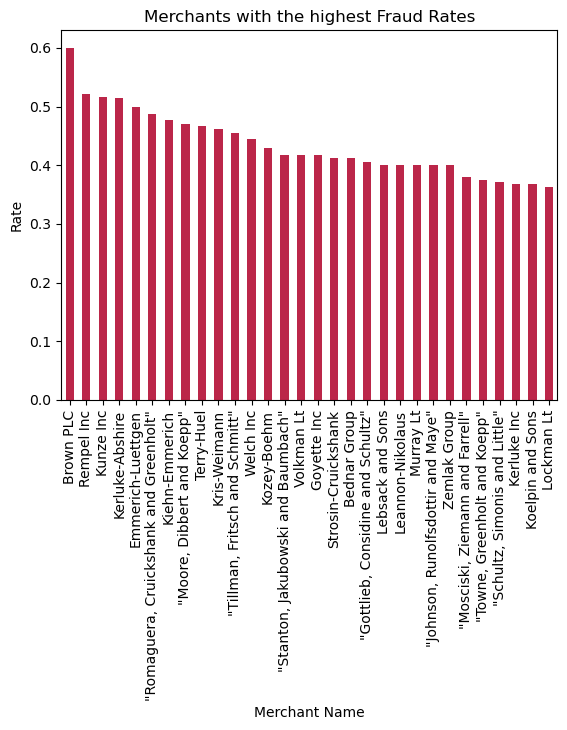

In [18]:
top_ten_fraud_by_merchant = fraud_by_merchant.head(30)
top_ten_fraud_by_merchant.plot(kind='bar', color='#BB2649')
plt.title('Merchants with the highest Fraud Rates')
plt.xlabel('Merchant Name')
plt.ylabel('Rate')

Text(0.5, 0, 'City')

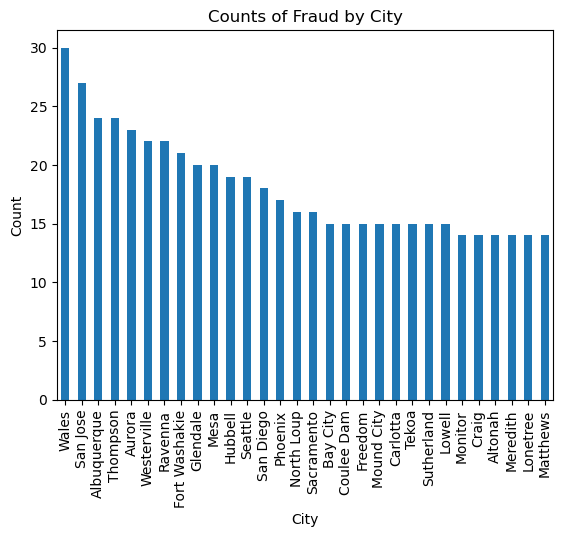

In [20]:
# 2. Check which cities have the highest rate and count of fraudulent transactions
fraud_by_city = df.groupby('city')['is_fraud'].sum().sort_values(ascending=False)
top_fraud_by_city = fraud_by_city.head(30)
top_fraud_by_city.plot(kind='bar')
plt.title('Counts of Fraud by City')
plt.ylabel('Count')
plt.xlabel('City')

Text(0.5, 0, 'City')

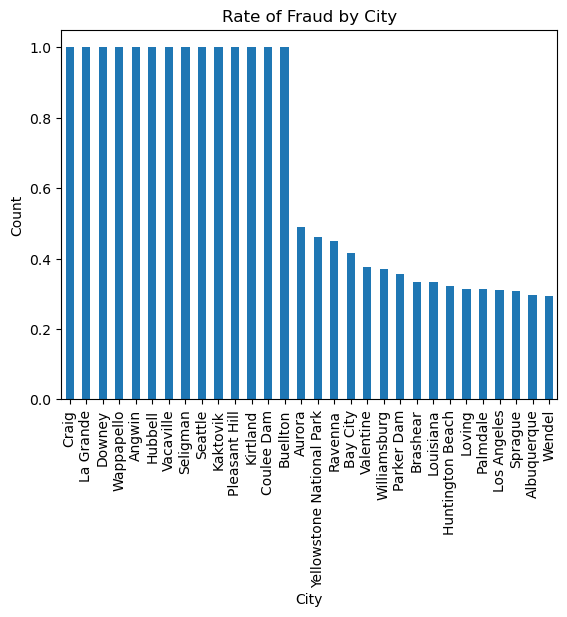

In [22]:
fraud_by_city = df.groupby('city')['is_fraud'].mean().sort_values(ascending=False)
top_fraud_by_city = fraud_by_city.head(30)
top_fraud_by_city.plot(kind='bar')
plt.title('Rate of Fraud by City')
plt.ylabel('Count')
plt.xlabel('City')

Text(0.5, 0, 'Hour (24hours)')

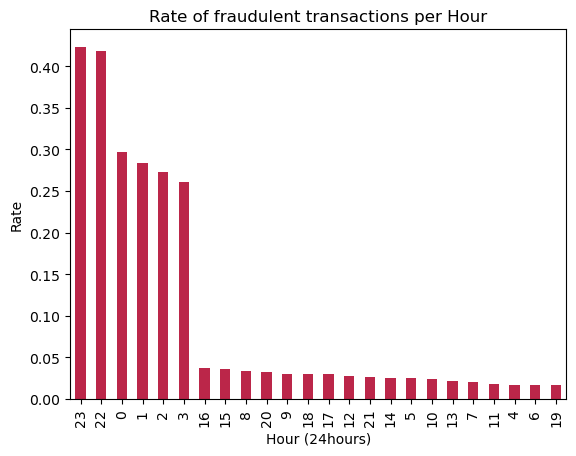

In [24]:
# time of day do fraudulent transactions happen the most?
df['date_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M')
df['hour'] = df['date_time'].dt.hour
fraudulent_hours = df.groupby('hour')['is_fraud'].mean().sort_values(ascending=False)
fraudulent_hours.plot(kind='bar', color='#BB2649')
plt.title('Rate of fraudulent transactions per Hour')
plt.ylabel('Rate')
plt.xlabel('Hour (24hours)')

Text(0.5, 0, 'Month')

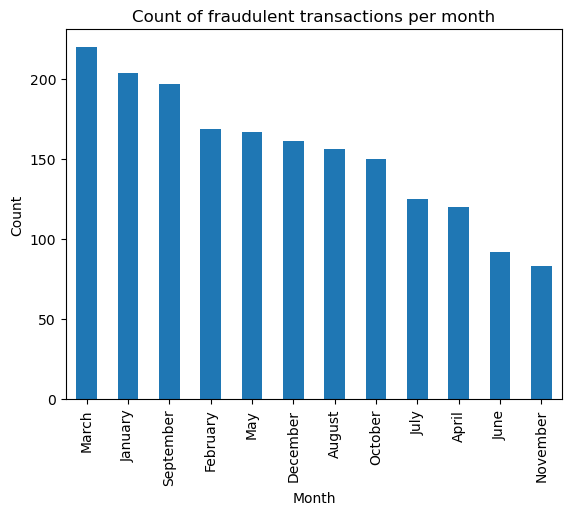

In [26]:
# Which months have high number of fraudulent transactions?
df['month'] = df['date_time'].dt.month_name()
fraudulent_months = df.groupby('month')['is_fraud'].sum().sort_values(ascending=False)
fraudulent_months.plot(kind='bar')
plt.title('Count of fraudulent transactions per month')
plt.ylabel('Count')
plt.xlabel('Month')

Text(0, 0.5, 'Rate')

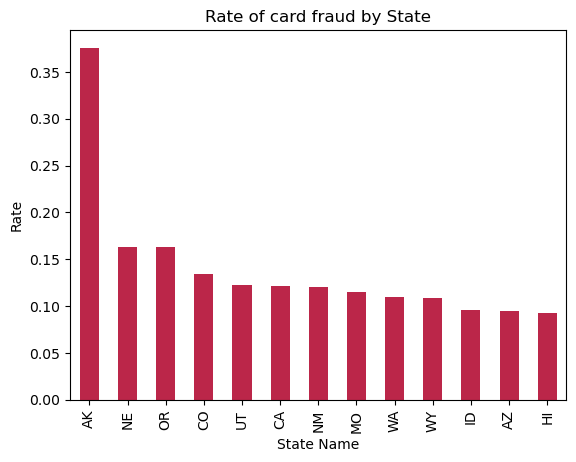

In [28]:
# Which states record the highest number of fraudulent transactions?
fraudulent_states = df.groupby('state')['is_fraud'].mean().sort_values(ascending=False)
fraudulent_states.plot(kind='bar', color='#BB2649')
plt.title('Rate of card fraud by State')
plt.xlabel('State Name')
plt.ylabel('Rate')

Text(0, 0.5, 'Rate')

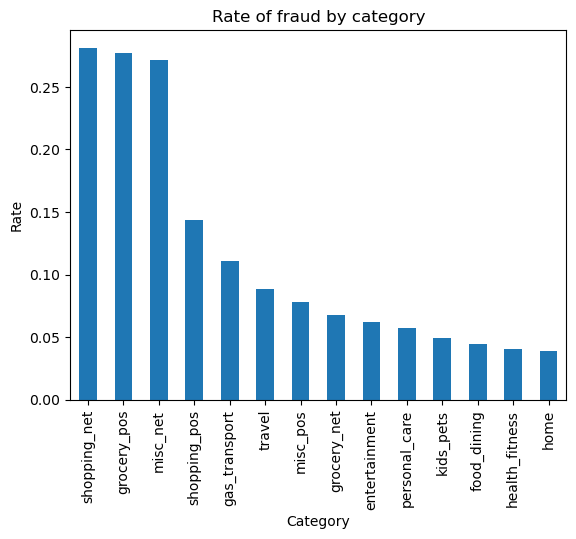

In [30]:
# Which categories of items record the highest rate of fraudulent transactions?
fraudulent_category = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
fraudulent_category.plot(kind='bar')
plt.title('Rate of fraud by category')
plt.xlabel('Category')
plt.ylabel('Rate')

Text(0, 0.5, 'Rate')

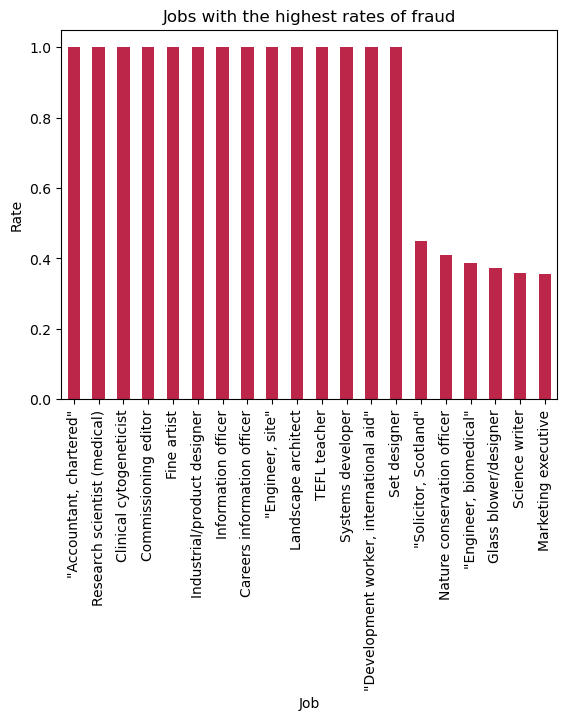

In [32]:
# Which job descriptions are most affected by fraud?
job_fraud = df.groupby('job')['is_fraud'].mean().sort_values(ascending=False)
top_ten_jobs = job_fraud.head(20)
top_ten_jobs.plot(kind='bar', color='#BB2649')
plt.title('Jobs with the highest rates of fraud')
plt.xlabel('Job')
plt.ylabel('Rate')

C:\Users\subal\AppData\Local\Temp\ipykernel_9752\971220862.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_fraud = df.groupby('agegroup')['is_fraud'].mean().sort_values(ascending=False)


Text(0, 0.5, 'Rate')

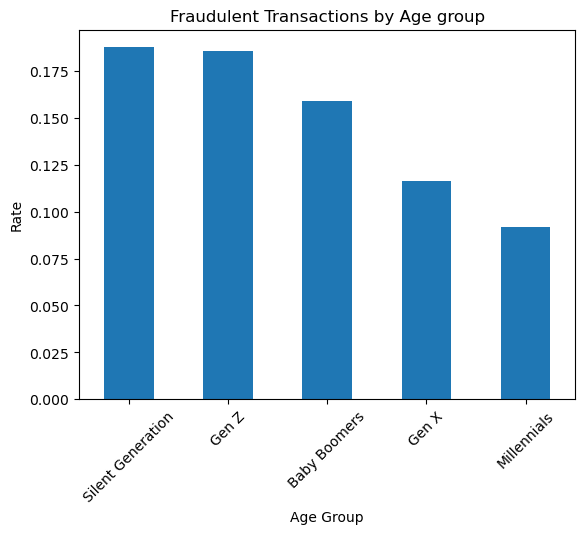

In [34]:
# Does fraudulent transactions occur among customers of certain age groups?
df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y')
df['yob'] = df['dob'].dt.year
df['age'] = 2019-df['yob']
bins = [0, 24, 39, 54, 74, float('inf')] 
labels = ['Gen Z', 'Millennials', 'Gen X', 'Baby Boomers', 'Silent Generation']
df['agegroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
age_fraud = df.groupby('agegroup')['is_fraud'].mean().sort_values(ascending=False)
age_fraud.plot(kind='bar')
plt.title('Fraudulent Transactions by Age group')
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Rate')

In [36]:
import folium
from folium.plugins import HeatMap

map_center = [df['lat'].mean(), df['long'].mean()]
m = folium.Map(location=map_center, zoom_start=5)

for _, row in df.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=row['city'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Save or display the map
m.save('map_from_dataframe_123.html')

ModuleNotFoundError: No module named 'folium'

In [ ]:
df